### Data
http://s3.amazonaws.com/datashader-data/osm-1billion.snappy.parq.zip

### Beispiel Online verfügbar
http://datashader.org/topics/osm-1billion.html

### Import

In [3]:
import dask.dataframe as dd
import dask.diagnostics as diag
import datashader as ds
import datashader.transfer_functions as tf

from colorcet import fire
from bokeh.io import output_notebook
from bokeh.resources import CDN

### Daten einlesen

In [4]:
df = dd.io.parquet.read_parquet('osm-1billion.snappy.parq')
df = df.persist()

In [5]:
print(len(df))
df.head()

1000050363


,x,y
0,16076076.0,-3627207.25
1,16832806.0,-4007314.75
2,15767838.0,-4390363.00
3,19442192.0,-4364528.00
4,16130131.0,-4548868.50


### Plot

In [9]:
bound = 20026376.39
bounds = dict(x_range = (-bound, bound), y_range = (int(-bound*0.4), int(bound*0.6)))
plot_width = 1000
plot_height = int(plot_width*0.5)

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, **bounds)

with diag.ProgressBar(), diag.Profiler() as prof, diag.ResourceProfiler(0.5) as rprof:
    agg = cvs.points(df, 'x', 'y', ds.count())

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed | 34.6s


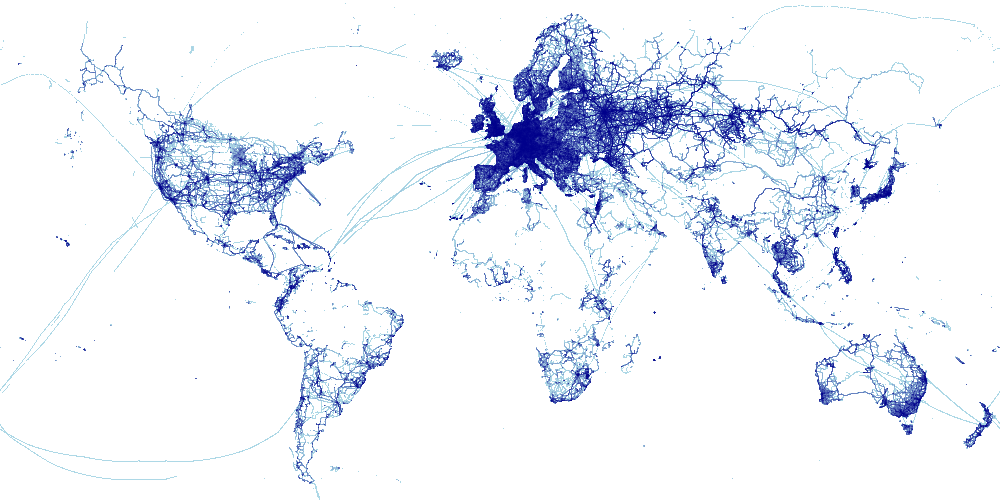

In [10]:
tf.shade(agg.where(agg > 15), cmap=["lightblue", "darkblue"])

### Performance

In [11]:
output_notebook(CDN, hide_banner=True)

#diag.visualize([prof, rprof])
diag.visualize([rprof])

bokeh.plotting.figure.Figure(
    id='3b3b9f26-317b-45f0-bb92-44eaf0528977',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='fe55c58d-58fc-4cff-980f-0090a6ac7d88',
         axis_label='Time (s)',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='bevel',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='947cba37-80c3-40b4-88ef-5e930556bb62',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='bevel',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='bevel',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='3b3b9f26-317b-45f0-bb92-44eaf0528977', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='d3c98dec-6f01-43be-9441-d72e49a30269',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={'memory': bokeh.models.ranges.Range1d(
         id='4837f55a-5ab5-4676-b6d5-d57e6f6de696',
         bounds=None,
         callback=None,
         end=5612.089344,
         js_event_callbacks={},
         js_property_callbacks={},
         max_interval=None,
         min_interval=None,
         name=None,
         reset_end=None,
         reset_start=None,
         start=566.284288,
         subscribed_events=[]